In [1]:
import argparse

import os
import cv2
import torch
import torch.nn as nn
import numpy as np
from models.loss import GANLoss, VGGFeatureExtractor, MVLoss, MVLoss2
from dataset import SRDataset
from tqdm import tqdm
import yaml
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [28]:
net_f = VGGFeatureExtractor(feature_layer=54, use_bn=False,
                                use_input_norm=True, device=device)
net_f.eval()
net_f.cuda()

VGGFeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), str

In [29]:
hr_path = f"../dataset/vimeo90k/hr/00002/0025"
hr = cv2.imread(f"baboon.png")[...,::-1]
fhr = (hr.astype('float')/255).transpose(2, 0, 1)
fhr = torch.from_numpy(fhr).to(device, dtype=torch.float)
fhr = torch.unsqueeze(fhr, 0)
output = net_f(fhr)
output = output[0].cpu().detach().numpy()
output = output.transpose(1, 2, 0)

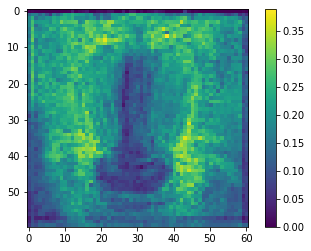

In [30]:
show = output[...,12]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(show)
plt.colorbar()